In [3]:
from databaseCommunication import getNCount
from dataframeFormating import fitRun_3b_linear, N_linear, createLabeledDataFrame, createLabeledDataFrame_2, fitRun_1and3b, fitRun_1and3b_2, fitRun_3b, fitRun_3b_2, getReducedDataframe, getReducedResults, deltaTime, N_polarized, N_polarized_pure3b
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

getNCount(117000)

106662000.0

In [5]:
# [ODT3_PD], [imageID_start, imageID_end]
labels = [[[1.5], [118639, 118686]],
          [[1.7], [118700, 118747]],
          [[1.9], [118750, 118797]],
          [[2.1], [118799, 118846]],
         ]
excluded = []

In [3]:
df = createLabeledDataFrame_2(labels)
df['BECHoldTime'] = df['BECHoldTime'].astype(float)
df['lattice_power'] = df['lattice_power'].astype(float)
df.to_pickle('data_save_210405_odt3.pickle')

In [6]:
df = pd.read_pickle('data_save_210405_odt3.pickle')
# Delete these row indexes from dataFrame
indexNames = pd.Index(np.where(df['imageID'].isin(excluded))[0])
df.drop(indexNames, inplace = True)

In [12]:
for index, row in df.iterrows():
    print(row['imageID'])

118639.0
118640.0
118641.0
118642.0
118643.0
118644.0
118645.0
118646.0
118647.0
118648.0
118649.0
118650.0
118651.0
118652.0
118653.0
118654.0
118655.0
118656.0
118657.0
118658.0
118659.0
118660.0
118661.0
118662.0
118663.0
118664.0
118665.0
118666.0
118667.0
118668.0
118669.0
118670.0
118671.0
118672.0
118673.0
118674.0
118675.0
118676.0
118677.0
118678.0
118679.0
118680.0
118681.0
118682.0
118683.0
118684.0
118685.0
118686.0
118700.0
118701.0
118702.0
118703.0
118704.0
118705.0
118706.0
118707.0
118708.0
118709.0
118710.0
118711.0
118712.0
118713.0
118714.0
118715.0
118716.0
118717.0
118718.0
118719.0
118720.0
118721.0
118722.0
118723.0
118724.0
118725.0
118726.0
118727.0
118728.0
118729.0
118730.0
118731.0
118732.0
118733.0
118734.0
118735.0
118736.0
118737.0
118738.0
118739.0
118740.0
118741.0
118742.0
118743.0
118744.0
118745.0
118746.0
118747.0
118750.0
118751.0
118752.0
118753.0
118754.0
118755.0
118756.0
118757.0
118758.0
118759.0
118760.0
118761.0
118762.0
118763.0
118764.0
1

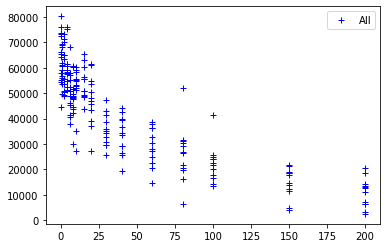

In [6]:
plt.figure()
plt.plot(df['BECHoldTime'], df['nCount'], '+', color = 'blue', label = 'All')
plt.legend()
plt.show()

#run = df[df['detuning'] == '0.5GHz']
#run1 = run[run['field_direction'] == 'Bz']
#run2 = run[run['field_direction'] == 'By']
#plt.figure()
#plt.plot(run1['BECHoldTime'], run1['nCount'], '+', color = 'blue', label = 'Bz')
#plt.plot(run2['BECHoldTime'], run2['nCount'], '+', color = 'red', label = 'By')
#plt.legend()
#plt.show()

We fit the polarized sample to $dN/dt = -\alpha N-\gamma N^{3}$, so $N(t) = \frac{\sqrt{\alpha}}{\sqrt{e^{2\alpha t}\left(\frac{a}{N(0)^{2}}+\gamma\right)-\gamma}}$ and the mixture one to $dN/dt = -\alpha N - \beta N^{2} -\gamma N^{3}$, so $N(t) = complicated$

In [12]:
results = []
for run in labels:
    lattice_power = run[0][0]
    popt, pcov = fitRun_1and3b_2(df, lattice_power)
    results += [{'lattice_power' : lattice_power,
                        'N0' : popt[0],
                        'alpha' : popt[1],
                        'gamma' : popt[2]}]
resultsDF = pd.DataFrame(results)
print('\n')
print(resultsDF)
print('\n')
print(resultsDF['alpha']*resultsDF['N0']/(resultsDF['gamma']*(resultsDF['N0']**3)))
#perr = np.sqrt(np.diag(pcov))



   lattice_power            N0     alpha         gamma
0            1.5  64235.742442  0.003872  4.824473e-12
1            1.7  61474.549650  0.000286  9.735972e-12
2            1.9  68806.186465  0.006035  4.283902e-12
3            2.1  56802.238434  0.009806  1.792574e-13


0     0.194506
1     0.007768
2     0.297582
3    16.954715
dtype: float64


We notice the decay is nearly 3-body in all case. To ensure that we can look at $\alpha N_{0}/(\gamma*N_{0}^{3})$ which at $t=0$ is never above a 10\%. So let's just fit to a 3body decay curve.
$dN/dt = -\gamma N^{3}$, so $N(t) = \frac{N_{0}}{\sqrt{1+N_{0}^{2}\gamma t}}$.

In [31]:
results = []
for run in labels:
    lattice_power = run[0][0]
    popt, pcov = fitRun_3b_2(df, lattice_power)
    results += [{'lattice_power' : lattice_power,
                        'N0' : popt[0],
                        'gamma' : popt[1]}]
resultsDF_pure3b = pd.DataFrame(results)
print('\n')
print(resultsDF_pure3b)
#perr = np.sqrt(np.diag(pcov))

max_time = 10

results_lin = []
for run in labels:
    lattice_power = run[0][0]
    popt, pcov = fitRun_3b_linear(df, lattice_power, max_time)
    results_lin += [{'lattice_power' : lattice_power,
                        'N0' : popt[0],
                        'gamma' : popt[1]}]
resultsDF_lin = pd.DataFrame(results_lin)
print('\n')
print(resultsDF_lin)
#perr = np.sqrt(np.diag(pcov))



   lattice_power            N0         gamma
0            1.5  65780.647279  1.493111e-11
1            1.7  61599.334015  1.997575e-11
2            1.9  70978.325591  1.576908e-11
3            2.1  60291.279770  1.449967e-11


   lattice_power            N0        gamma
0            1.5  64192.728100  1376.723549
1            1.7  63377.356655  2461.478385
2            1.9  67619.663823  1224.096132
3            2.1  58575.518202  1230.751422


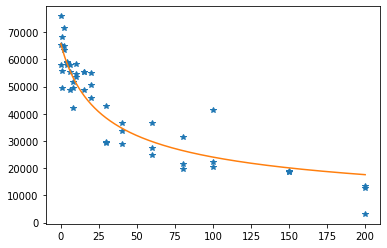

In [32]:
lattice_power_to_plot = 1.5
time = np.linspace(0, 200, 1000)
df_temp = df[df['lattice_power'] == lattice_power_to_plot]
result_temp = resultsDF_pure3b[resultsDF_pure3b['lattice_power'] == lattice_power_to_plot]
plt.figure()
plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '*')
plt.plot(time, N_polarized_pure3b(time, result_temp['N0'][0], result_temp['gamma'][0]))
plt.show()

0 1.5
1 1.7
2 1.9
3 2.1


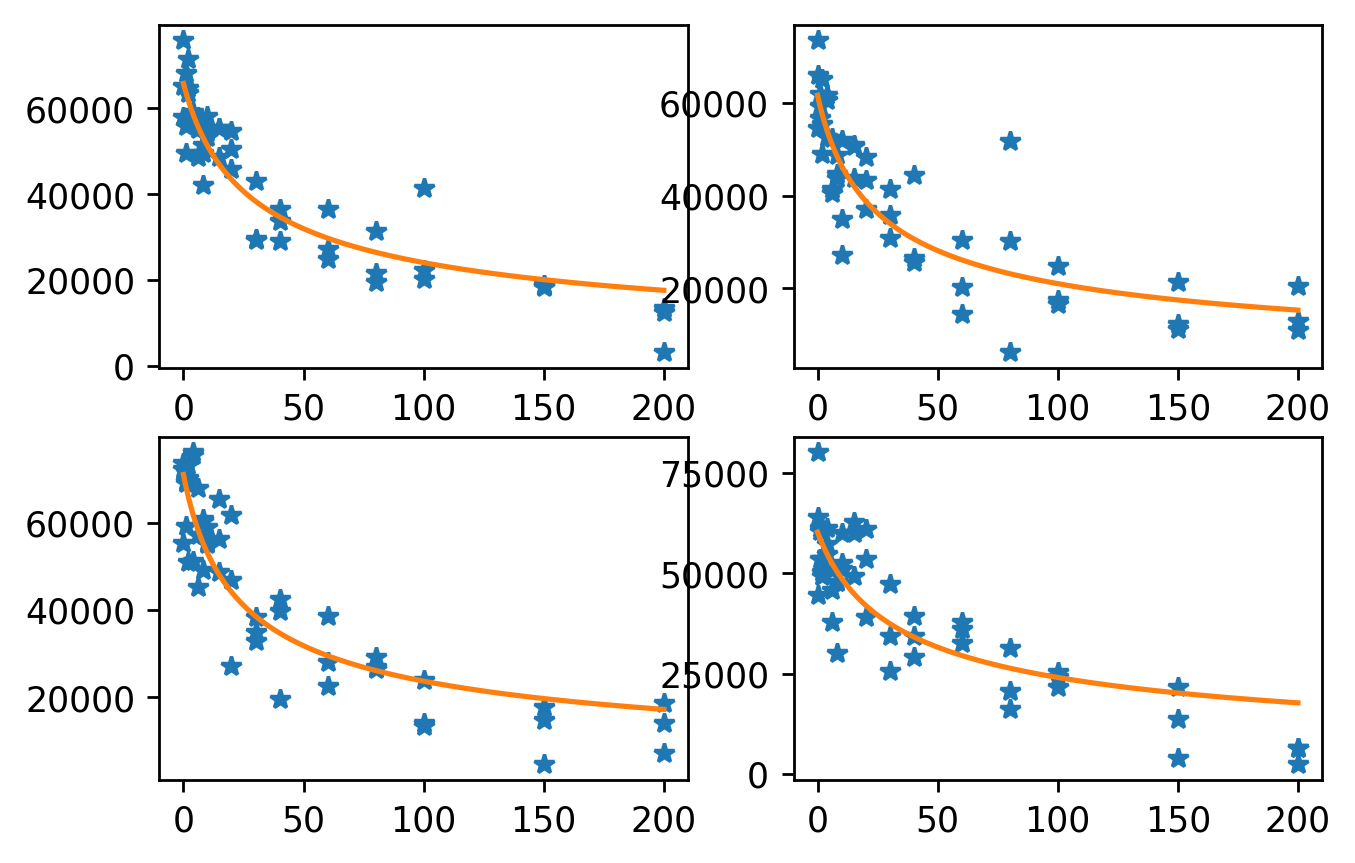

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=2, dpi = 250)
i = 0
time = np.linspace(0, 200, 1000)

for row in ax:
    for col in row:
        try:
            lattice_power_to_plot = resultsDF_pure3b['lattice_power'][i]
            print(i, lattice_power_to_plot)
            df_temp = df[df['lattice_power'] == lattice_power_to_plot]
            result_temp = resultsDF_pure3b[resultsDF_pure3b['lattice_power'] == lattice_power_to_plot]
            col.plot(df_temp['BECHoldTime'], df_temp['nCount'], '*')
            col.plot(time, N_polarized_pure3b(time, result_temp['N0'].mean(), result_temp['gamma'].mean()))
        except:
            print('cannot print')
            pass
        i += 1

In [38]:
resultsDF_lin

,lattice_power,N0,gamma
0,1.5,64192.728100,1376.723549
1,1.7,63377.356655,2461.478385
2,1.9,67619.663823,1224.096132
3,2.1,58575.518202,1230.751422


0 1.5
1 1.7
2 1.9
3 2.1


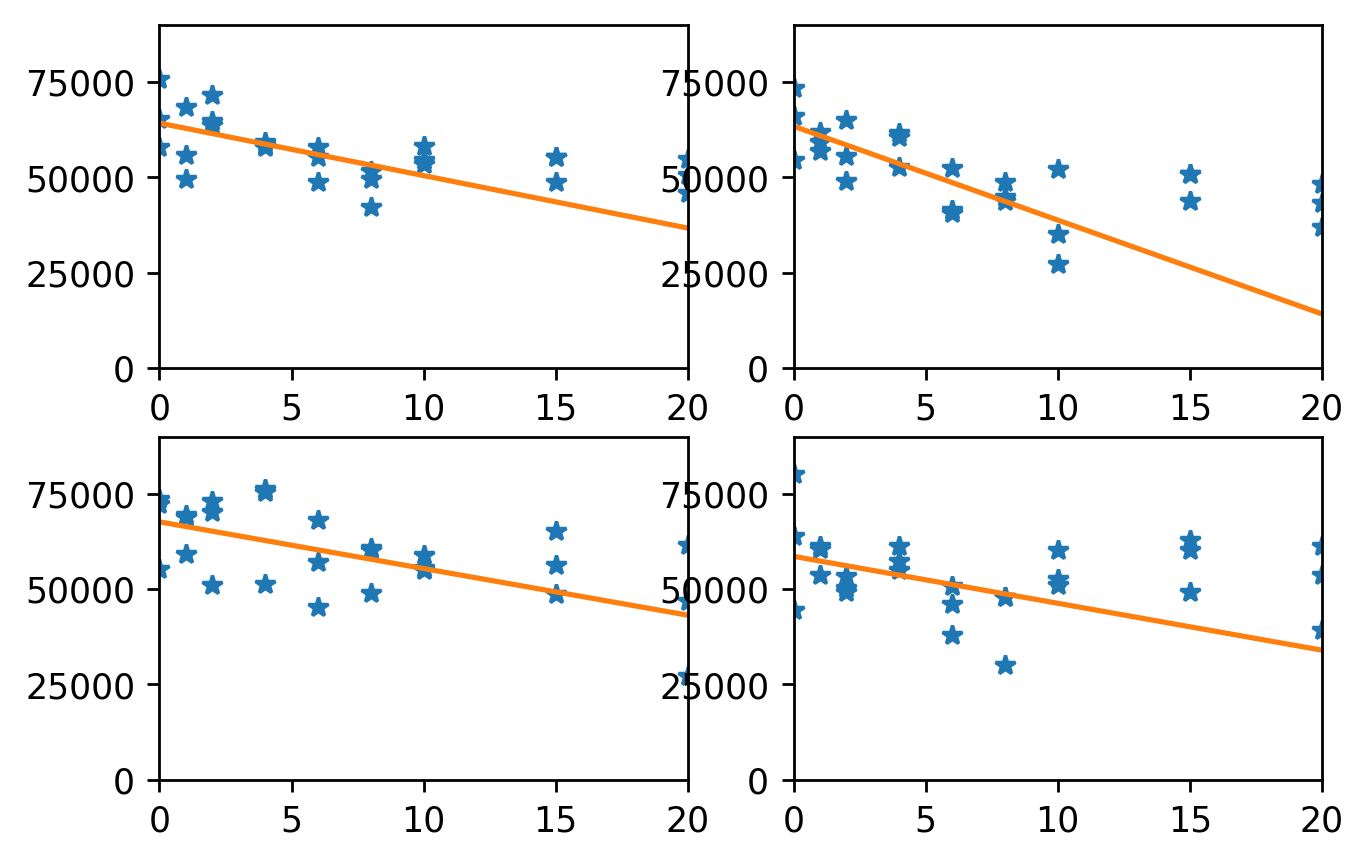

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=2, dpi = 250)
i = 0
time = np.linspace(0, 200, 1000)

for row in ax:
    for col in row:
        try:
            lattice_power_to_plot = resultsDF_lin['lattice_power'][i]
            print(i, lattice_power_to_plot)
            df_temp = df[df['lattice_power'] == lattice_power_to_plot]
            result_temp = resultsDF_lin[resultsDF_lin['lattice_power'] == lattice_power_to_plot]
            col.plot(df_temp['BECHoldTime'], df_temp['nCount'], '*')
            col.plot(time, N_linear(time, result_temp['N0'].mean(), result_temp['gamma'].mean()))
            col.set_xlim((0,20))
            col.set_ylim((0,90000))
        except:
            print('cannot print')
            pass
        i += 1

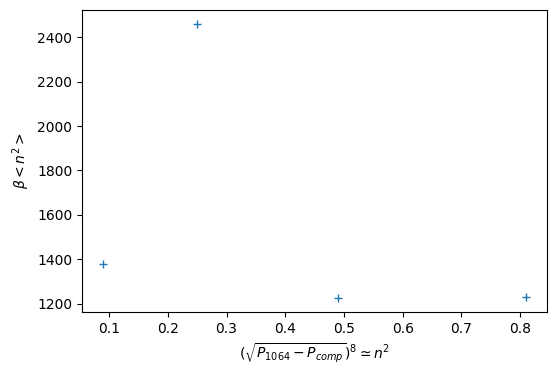

In [40]:
Compensation_power = 1.2
trap_frequency_proxy = np.sqrt(resultsDF_lin['lattice_power'] - Compensation_power)
density_squared_proxy = trap_frequency_proxy**2
plt.figure(dpi = 100)
plt.plot(density_squared_proxy**2, resultsDF_lin['gamma'], '+')
plt.xlabel(r'$(\sqrt{P_{1064} - P_{comp}})^{8} \simeq n^{2}$')
plt.ylabel(r'$\beta<n^{2}>$')
plt.show()

In [21]:
max_time = 21

results_lin = []
for run in labels:
    lattice_power = run[0][0]
    popt, pcov = fitRun_3b_linear(df, lattice_power, max_time)
    results_lin += [{'lattice_power' : lattice_power,
                        'N0' : popt[0],
                        'gamma' : popt[1]}]
resultsDF_lin = pd.DataFrame(results_lin)
print('\n')
print(resultsDF_lin)
#perr = np.sqrt(np.diag(pcov))

results_lin2 = []
for run in labels:
    lattice_power = run[0][0]
    popt, pcov = fitRun_3b_linear(df2, lattice_power, max_time)
    results_lin2 += [{'lattice_power' : lattice_power,
                        'N0' : popt[0],
                        'gamma' : popt[1]}]
resultsDF_lin2 = pd.DataFrame(results_lin2)
print('\n')
print(resultsDF_lin_2)
#perr = np.sqrt(np.diag(pcov))



   lattice_power            N0        gamma
0            1.5  70632.116636  1050.940147
1            1.3  73726.184031  1080.039517
2            1.1  72636.131395  1011.224988
3            0.9  68669.192142   912.622161
4            0.7  77204.459177  1335.451504
5            0.5  68482.138889   993.812428
6            0.3  78811.693063  1353.862185
7            0.1  69964.100675  1195.816759


   lattice_power            N0        gamma
0            1.5  73736.866176  1605.542357
1            1.3  66933.778284  1116.714852
2            1.1  73574.662415  1549.842855
3            0.9  70716.180479   831.489257
4            0.7  74820.554988  1268.136286
5            0.5  70017.491713   858.117557
6            0.3  76960.230816  1383.925414
7            0.1  82411.782689  1712.965316


1 1.3
2 1.1
3 0.9
4 0.7
5 0.5
6 0.3
7 0.1
cannot print
cannot print


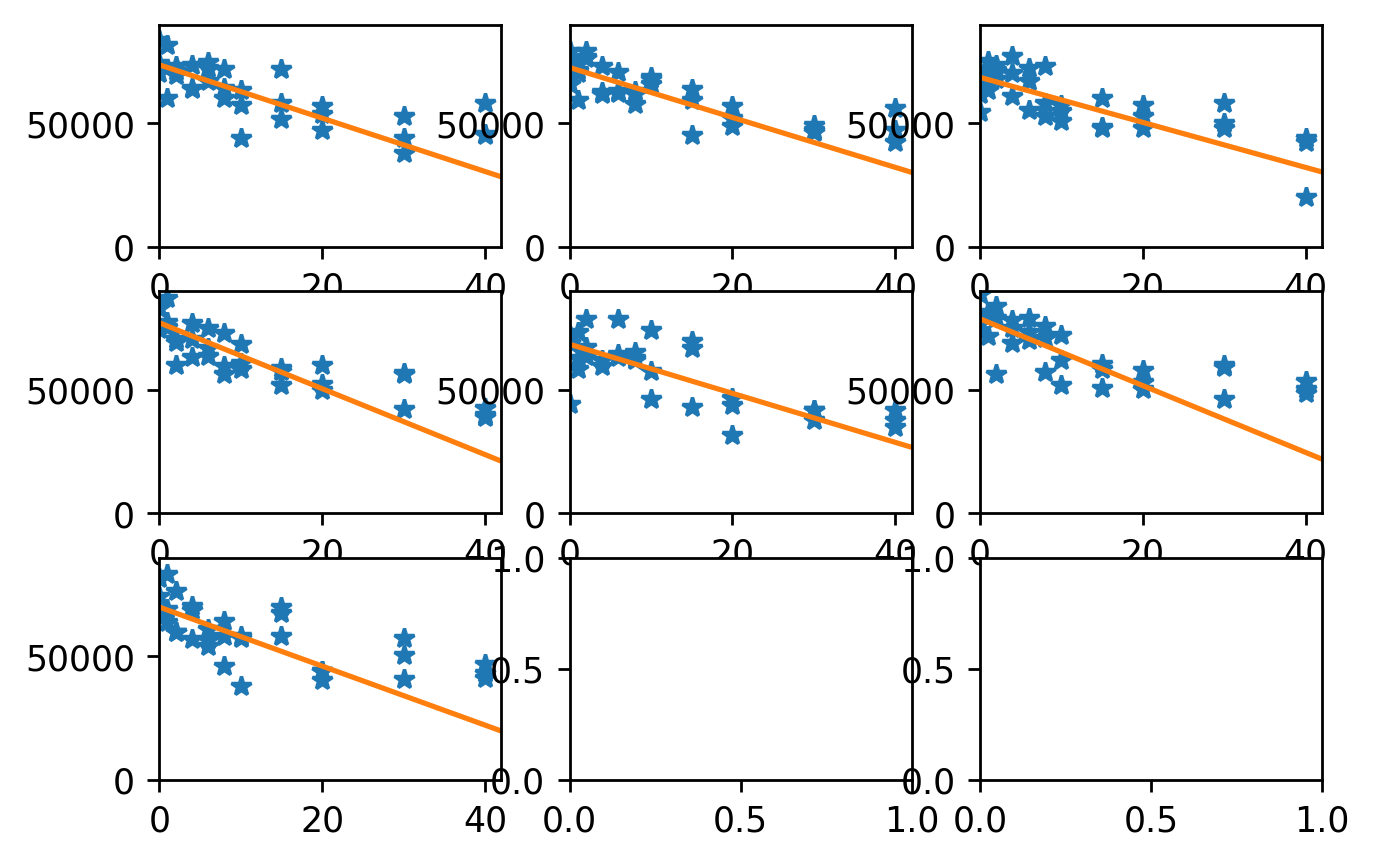

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=3, dpi = 250)
i = 0
time = np.linspace(0, 200, 1000)

for row in ax:
    for col in row:
        i += 1
        try:
            lattice_power_to_plot = resultsDF_lin['lattice_power'][i]
            print(i, lattice_power_to_plot)
            df_temp = df[df['lattice_power'] == lattice_power_to_plot]
            result_temp = resultsDF_lin[resultsDF_lin['lattice_power'] == lattice_power_to_plot]
            col.plot(df_temp['BECHoldTime'], df_temp['nCount'], '*')
            col.plot(time, N_linear(time, result_temp['N0'].mean(), result_temp['gamma'].mean()))
            col.set_xlim((0,2*max_time))
            col.set_ylim((0, 90000))
        except:
            print('cannot print')
            pass

Now we should look at how much time we should shift:

1 1.3
2 1.1
3 0.9
4 0.7
5 0.5
6 0.3
7 0.1
cannot print
cannot print


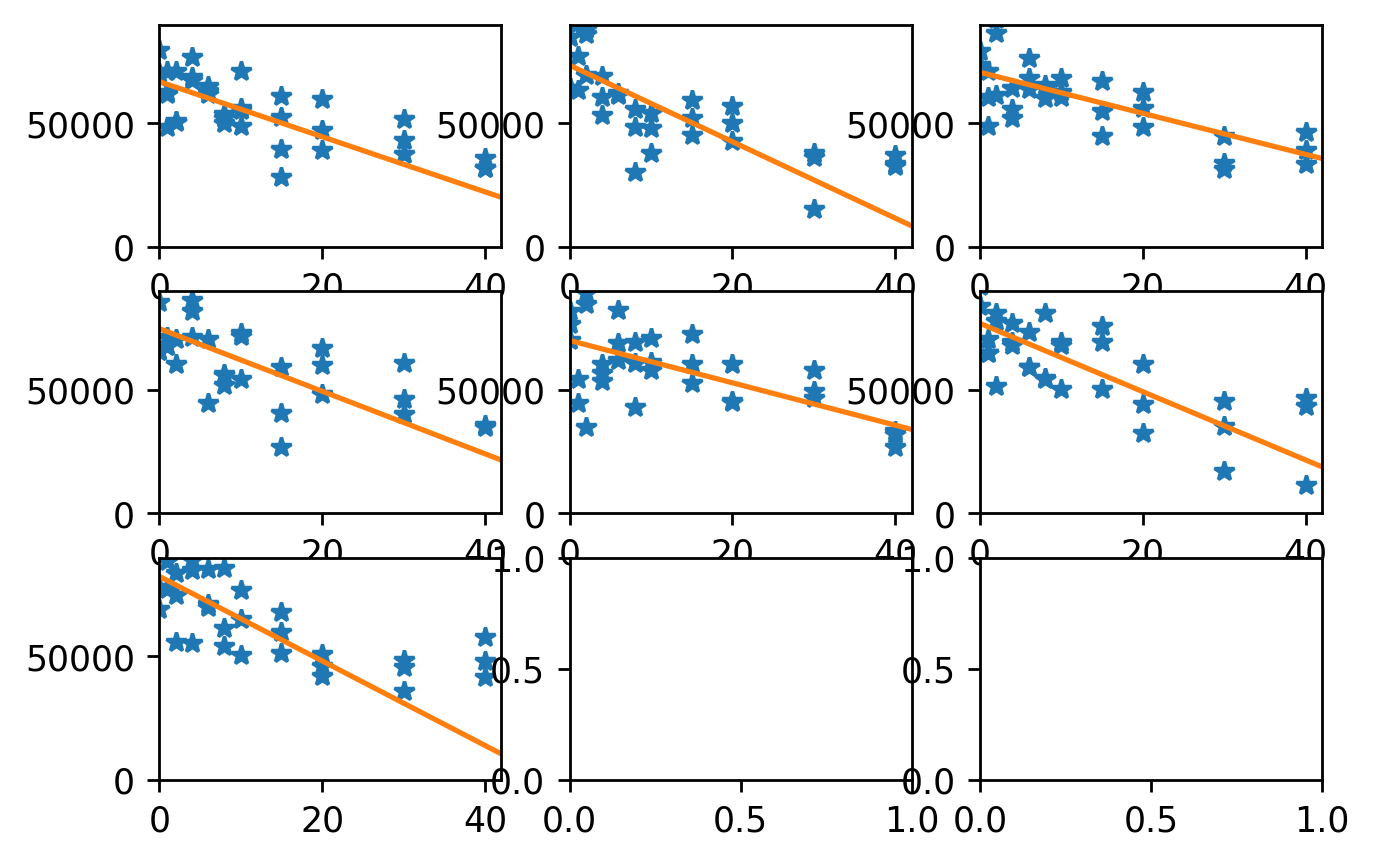

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=3, dpi = 250)
i = 0
time = np.linspace(0, 200, 1000)

for row in ax:
    for col in row:
        i += 1
        try:
            lattice_power_to_plot = resultsDF_lin2['lattice_power'][i]
            print(i, lattice_power_to_plot)
            df_temp = df2[df2['lattice_power'] == lattice_power_to_plot]
            result_temp = resultsDF_lin2[resultsDF_lin2['lattice_power'] == lattice_power_to_plot]
            col.plot(df_temp['BECHoldTime'], df_temp['nCount'], '*')
            col.plot(time, N_linear(time, result_temp['N0'].mean(), result_temp['gamma'].mean()))
            col.set_xlim((0,2*max_time))
            col.set_ylim((0, 90000))
        except:
            print('cannot print')
            pass

Now we can calculate the ration of the beta, provided the derivative of the N_polarized_pure3b function: $\frac{dN}{dt} = -\frac{1}{2}N_{0}^{3}\gamma\left(1+N_{0}^{2}\gamma t\right)^{-3/2}$

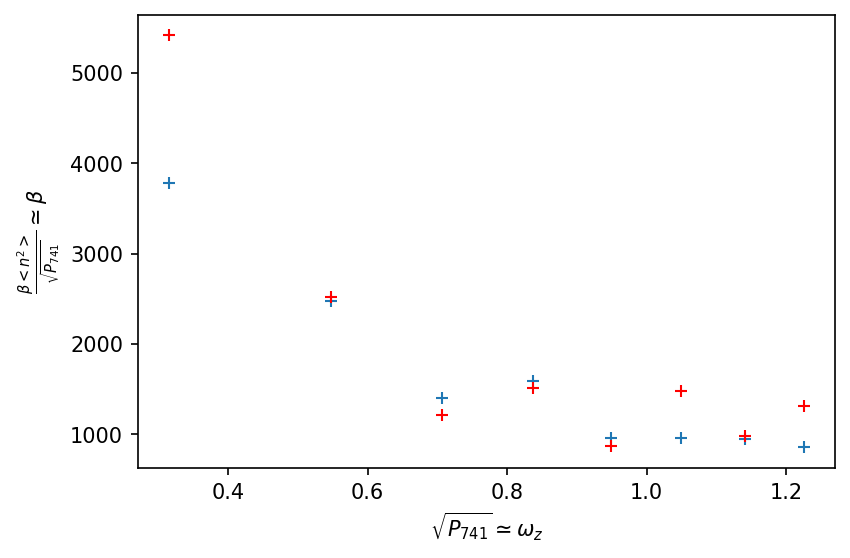

In [24]:
plt.figure(dpi = 150)
plt.plot(resultsDF_lin['lattice_power']**(1/2), resultsDF_lin['gamma']/resultsDF_lin['lattice_power']**(1/2), '+')
plt.plot(resultsDF_lin2['lattice_power']**(1/2), resultsDF_lin2['gamma']/resultsDF_lin2['lattice_power']**(1/2), 'r+')
plt.xlabel(r'$\sqrt{P_{741}} \simeq \omega_{z}$')
plt.ylabel(r'$\frac{\beta<n^{2}>}{\sqrt{P_{741}}} \simeq \beta$')
plt.show()

In [18]:
detuning = '1.5V'
TOF = 4
beta_y_init = getBeta(resultsDF_pure3b, detuning, 'By', TOF)  # this is the gamma from the fit
beta_z_init = getBeta(resultsDF_pure3b, detuning, 'Bz', TOF)
dt = deltaTime(resultsDF_pure3b, detuning, TOF)

results_By = getReducedResults(resultsDF_pure3b, detuning, 'By', TOF)  # this is the full results of a fit
results_Bz = getReducedResults(resultsDF_pure3b, detuning, 'Bz', TOF)
N0_y, gamma_y = results_By['N0'].iloc[0], results_By['gamma'].iloc[0]
N0_z, gamma_z = results_Bz['N0'].iloc[0], results_Bz['gamma'].iloc[0]
        
beta_y = dN_polarized_pure3b_dt(0, N0_y, gamma_y)
beta_z = dN_polarized_pure3b_dt(dt, N0_z, gamma_z)
#beta_z/beta_y
print(beta_y)
print(beta_z)


-1807.7246420591434
-443.11571006855024


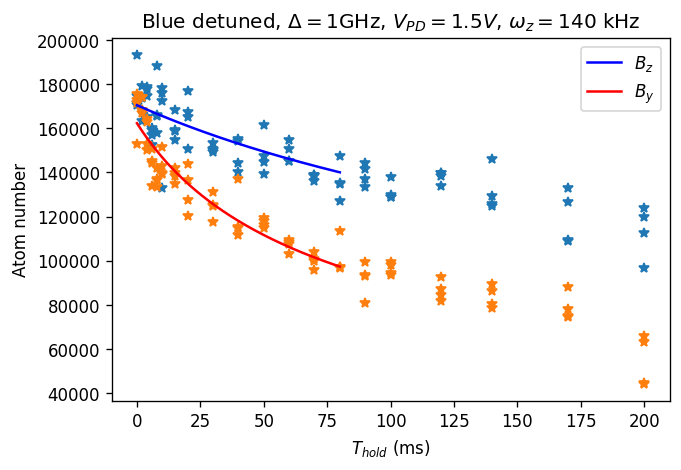

In [20]:
detuning = '1.5V'
TOF = 4
df_reduced_z = getReducedDataframe(df, detuning,'Bz', TOF)
df_reduced_y = getReducedDataframe(df, detuning,'By', TOF)
result_reduced_z = getReducedResults(resultsDF_pure3b, detuning, 'Bz', TOF)
result_reduced_y = getReducedResults(resultsDF_pure3b, detuning, 'By', TOF)

dNdt = dN_polarized_pure3b_dt(dt, result_reduced_z['N0'].iloc[0], result_reduced_z['gamma'].iloc[0])
holdTime = np.linspace(0,80, 300)
plt.figure(dpi = 120)
plt.plot(df_reduced_z['BECHoldTime'], df_reduced_z['nCount'], '*')
plt.plot(df_reduced_y['BECHoldTime'], df_reduced_y['nCount'], '*')
plt.plot(holdTime, N_polarized_pure3b(holdTime, result_reduced_z['N0'].iloc[0], result_reduced_z['gamma'].iloc[0]), color = 'blue', label = '$B_{z}$')
plt.plot(holdTime, N_polarized_pure3b(holdTime, result_reduced_y['N0'].iloc[0], result_reduced_y['gamma'].iloc[0]), color = 'red', label = '$B_{y}$')
plt.title('Blue detuned, $\Delta = 1$GHz, $V_{PD} = 1.5V$, $\omega_{z} = 140$ kHz')
plt.legend()
plt.xlabel('$T_{hold}$ (ms)')
plt.ylabel('Atom number')
plt.show()

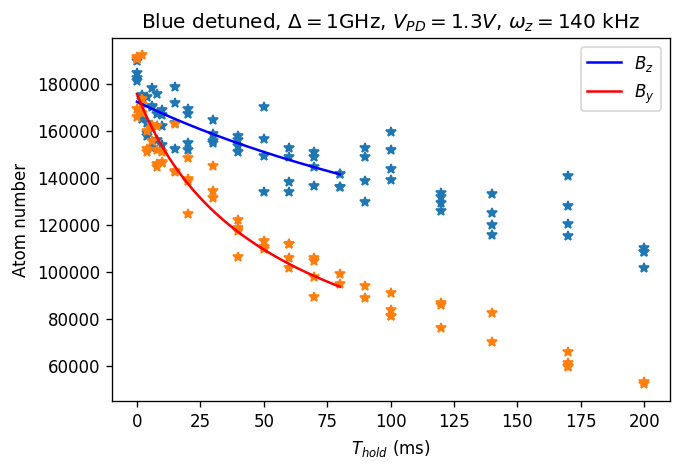

In [22]:
detuning = '1.3V'
TOF = 4
df_reduced_z = getReducedDataframe(df, detuning,'Bz', TOF)
df_reduced_y = getReducedDataframe(df, detuning,'By', TOF)
result_reduced_z = getReducedResults(resultsDF_pure3b, detuning, 'Bz', TOF)
result_reduced_y = getReducedResults(resultsDF_pure3b, detuning, 'By', TOF)

dNdt = dN_polarized_pure3b_dt(dt, result_reduced_z['N0'].iloc[0], result_reduced_z['gamma'].iloc[0])
holdTime = np.linspace(0,80, 300)
plt.figure(dpi = 120)
plt.plot(df_reduced_z['BECHoldTime'], df_reduced_z['nCount'], '*')
plt.plot(df_reduced_y['BECHoldTime'], df_reduced_y['nCount'], '*')
plt.plot(holdTime, N_polarized_pure3b(holdTime, result_reduced_z['N0'].iloc[0], result_reduced_z['gamma'].iloc[0]), color = 'blue', label = '$B_{z}$')
plt.plot(holdTime, N_polarized_pure3b(holdTime, result_reduced_y['N0'].iloc[0], result_reduced_y['gamma'].iloc[0]), color = 'red', label = '$B_{y}$')
plt.title('Blue detuned, $\Delta = 1$GHz, $V_{PD} = 1.3V$, $\omega_{z} = 140$ kHz')
plt.legend()
plt.xlabel('$T_{hold}$ (ms)')
plt.ylabel('Atom number')
plt.show()

In [15]:
resultsDF_pure3b

,detuning,TOF,field_direction,N0,gamma
0,0.5GHz,3,Bz,131028.827443,1.713659e-12
1,0.5GHz,3,By,132199.355160,3.000413e-12


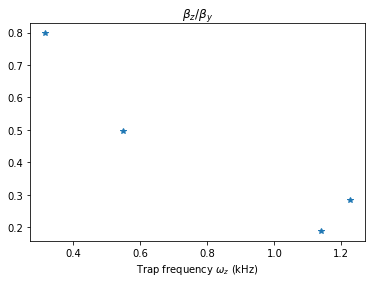

In [21]:
points15V = results_betaRatio[results_betaRatio['detuning'] == '1.5V']['betaRatio']
points13V = results_betaRatio[results_betaRatio['detuning'] == '1.3V']['betaRatio']
points03V = results_betaRatio[results_betaRatio['detuning'] == '0.3V']['betaRatio']
points01V = results_betaRatio[results_betaRatio['detuning'] == '0.1V']['betaRatio']
ratios = [points15V, points13V, points03V, points01V]
plt.figure()
plt.plot(np.sqrt(np.array([1.5, 1.3, 0.3, 0.1])), ratios, '*')
plt.title(r'$\beta_{z}/\beta_{y}$')
plt.xlabel(r'Trap frequency $\omega_{z}$ (kHz)')
plt.show()

In [17]:
results_betaRatio

,detuning,TOF,betaRatio
0,0.5GHz,3,0.556104


It doesn't look good at all, it should be reversed, the $\beta_{z}$ should be equal to $\beta_{y}$ for small $\omega_{z}$ and drop at the threshold.

0.5GHz 3


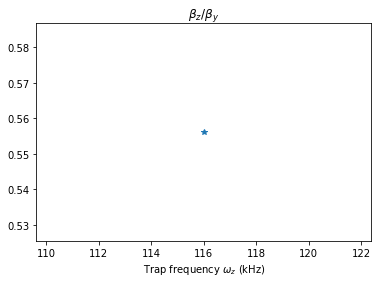

In [26]:
def dN_polarized_pure3b_dt(t, N0, gamma):
    return -0.5*N0**3*gamma*(1+N0**2*gamma*t)**(-3/2)

def getBeta(results, detuning, field_direction, TOF):
    temp = results[results['detuning'] == detuning]
    temp = temp[temp['TOF'] == TOF]
    return temp[temp['field_direction'] == field_direction]['gamma']

results_betaRatio = []
for detuning in ['0.5GHz']:#, '1.5GHz']:
    for TOF in [3]:#, 3]:
        print(detuning, TOF)
        beta_y_init = getBeta(resultsDF_pure3b, detuning, 'By', TOF)
        beta_z_init = getBeta(resultsDF_pure3b, detuning, 'Bz', TOF)
        dt = deltaTime(resultsDF_pure3b, detuning, TOF)
        
        results_By = getReducedResults(resultsDF_pure3b, detuning, 'By', TOF)
        results_Bz = getReducedResults(resultsDF_pure3b, detuning, 'Bz', TOF)
        N0_y, gamma_y = results_By['N0'].iloc[0], results_By['gamma'].iloc[0]
        N0_z, gamma_z = results_Bz['N0'].iloc[0], results_Bz['gamma'].iloc[0]
        
        beta_y = dN_polarized_pure3b_dt(0, N0_y, gamma_y)
        beta_z = dN_polarized_pure3b_dt(0, N0_z, gamma_z)
        
        results_betaRatio += [{'detuning' : detuning,
                        'TOF' : TOF,
                        'betaRatio' : beta_z/beta_y}]

results_betaRatio = pd.DataFrame(results_betaRatio)

results_betaRatio

points05G = results_betaRatio[results_betaRatio['detuning'] == '0.5GHz']['betaRatio']
#points15G = results_betaRatio[results_betaRatio['detuning'] == '1.5GHz']['betaRatio']

plt.figure()
plt.plot([116], points05G, '*')
#plt.plot([96], points15G, '*')
plt.title(r'$\beta_{z}/\beta_{y}$')
plt.xlabel(r'Trap frequency $\omega_{z}$ (kHz)')
plt.show()